### **1.**	**Calculate mean, variance, standard deviation, and standard error of Close Price** 

In [3]:
import pandas as pd

infy_data = pd.read_csv('/content/infy data.csv')
infy_data

,Symbol,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,INFY,29-Jul-21,1605.60,1600.10,1620.00,1600.10,1615.50,1617.00,1614.80,4660873,7526375522,144550,2926321,62.78
1,INFY,30-Jul-21,1617.00,1610.00,1623.40,1606.15,1611.75,1610.50,1613.35,6234257,10058016360,136907,4485149,71.94
2,INFY,02-Aug-21,1610.50,1627.45,1634.75,1619.20,1632.00,1631.55,1627.56,5553389,9038450771,123236,4318503,77.76
3,INFY,03-Aug-21,1631.55,1647.00,1658.65,1635.60,1657.00,1655.20,1645.86,5513668,9074703957,140415,3887460,70.51
4,INFY,04-Aug-21,1655.20,1669.10,1679.90,1639.05,1648.55,1649.25,1653.26,6740391,11143605331,152430,4752601,70.51
5,INFY,05-Aug-21,1649.25,1649.50,1666.00,1647.05,1652.00,1653.55,1655.81,5420536,8975400927,124049,3761486,69.39
6,INFY,06-Aug-21,1653.55,1657.00,1660.65,1644.00,1652.10,1650.20,1652.90,3754855,6206401477,100454,2558438,68.14
7,INFY,09-Aug-21,1650.20,1661.00,1667.45,1646.40,1664.40,1663.30,1656.74,5018477,8314309678,113096,3673439,73.20
8,INFY,10-Aug-21,1663.30,1668.00,1680.00,1661.05,1674.15,1677.25,1674.29,6846517,11463058438,135096,5175394,75.59
9,INFY,11-Aug-21,1677.25,1674.80,1684.00,1668.00,1675.10,1677.55,1676.00,4899639,8211808502,149326,3586596,73.20


In [ ]:
infy_data.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,1.100000e+01,11.000000,1.100000e+01,11.000000
mean,1644.631818,1649.372727,1661.027273,1640.054545,1651.590909,1652.268182,1650.747273,5.482016e+06,9.051230e+09,133797.909091,3.940271e+06,71.594545
std,25.224435,26.319207,25.226022,23.833731,23.771998,24.939770,24.245744,9.090673e+05,1.520892e+09,16868.021434,7.662155e+05,4.057729
min,1605.600000,1600.100000,1620.000000,1600.100000,1611.750000,1610.500000,1613.350000,3.754855e+06,6.206401e+09,100454.000000,2.558438e+06,62.780000
25%,1624.275000,1637.225000,1646.700000,1627.400000,1640.275000,1640.400000,1636.710000,4.959058e+06,8.263059e+09,123642.500000,3.630018e+06,69.950000
50%,1650.200000,1657.000000,1666.000000,1644.000000,1652.100000,1653.550000,1653.260000,5.513668e+06,9.038451e+09,136907.000000,3.887460e+06,71.940000
75%,1659.250000,1668.550000,1679.950000,1654.050000,1669.275000,1670.275000,1665.515000,5.946918e+06,9.804708e+09,146938.000000,4.401826e+06,73.860000
max,1677.550000,1679.150000,1696.500000,1674.000000,1684.950000,1689.600000,1687.650000,6.846517e+06,1.146306e+10,152430.000000,5.175394e+06,77.760000


Mean

In [ ]:
#calculating mean without using built-in functions
no_of_items = len(infy_data['Close Price'])
mean = sum(infy_data['Close Price'])/no_of_items

print("Mean wihtout using built-in function is : ",mean)

#Using mean() built-in funciton
print("\nMean with built-in function is : ",infy_data['Close Price'].mean())

Mean wihtout using built-in function is :  1652.2681818181816

Mean with built-in function is :  1652.2681818181816


Variance

In [ ]:
#calculating deviations first then retriving variance through it (Without using built-in functions)

deviations = []
for i in infy_data['Close Price']:
  deviations.append((i - mean) ** 2 )

variance = sum(deviations)/(no_of_items-1)
print("Variance without using built-in function is : ",variance)


#Using stat.variance() built-in function
import statistics as stat
print("\nVariance with built-in function is : ",stat.variance(infy_data['Close Price']))

Variance without using built-in function is :  621.9921363636355

Variance with built-in function is :  621.9921363636355


Standard Deviation

In [ ]:
#calculating standard deviation without using built-in function
import math
standard_deviation = math.sqrt(variance)
print("Standard deviation without using built-in function is :", standard_deviation)


#using stat.stdev() built-in function
print("\nStandard deviation with built-in function is : ",stat.stdev(infy_data['Close Price']))

Standard deviation without using built-in function is : 24.93977017463544

Standard deviation with built-in function is :  24.93977017463544


Standard Error

In [ ]:
#Calculating standard error without using built-in function
standard_error = standard_deviation/math.sqrt(no_of_items)
print("Standard error of without using built-in function is : ",standard_error)

#using sem() built-in function
from scipy.stats import sem
print("\nStandard error with built-in function is : ",sem(infy_data['Close Price']))

Standard error of without using built-in function is :  7.519623638814739

Standard error with built-in function is :  7.51962363881474


### **2.	Calculate Covariance and Correlation between Open Price and Close Price**

Covariance

In [ ]:
def covarfn(column1, column2, avg_column1, avg_column2):
    covariance = 0
  
    for i in range(0, len(column1)):
        covariance += (column1[i] - avg_column1) * (column2[i] - avg_column2)
    return (covariance / (len(column1)-1))
  

avg_column1 = sum(infy_data["Open Price"])/len(infy_data["Open Price"])  
avg_column2 = sum(infy_data["Close Price"])/len(infy_data["Close Price"])

#finding covariance using function
covariance_manual = covarfn(infy_data["Open Price"],infy_data["Close Price"],avg_column1,avg_column2)

#finding coariance using in-built function
covariance_inbuilt = infy_data["Open Price"].cov(infy_data["Close Price"])


print("Covairance between Open Price and Close Price without using built-in function : ", covar)
print("\nCovariannce between Open Price and Close Price with built-in function : ", cov)

Covairance between Open Price and Close Price without using built-in function :  610.2477954545457

Covariannce between Open Price and Close Price with built-in function :  610.2477954545457


Correlation

In [ ]:
import math
def correlationCoefficient(col1, col2, n) :
    sum_col1 = 0
    sum_col2 = 0
    sum_both = 0
    squareSum_col1 = 0
    squareSum_col2 = 0
    i = 0
    while i < n :
        sum_col1 = sum_col1 + col1[i]
        sum_col2 = sum_col2 + col2[i]
        sum_both = sum_both + col1[i] * col2[i]

        squareSum_col1 = squareSum_col1 + col1[i] * col1[i]
        squareSum_col2 = squareSum_col2 + col2[i] * col2[i]  
        i = i + 1
       
       #using formula for calculating correlation function
    corr = (float)(n * sum_both - sum_col1 * sum_col2)/(float)(math.sqrt((n * squareSum_col1 - sum_col1 * sum_col1)* (n * squareSum_col2 - sum_col2 * sum_col2)))
    return corr
      

column_1 = infy_data["Close Price"]
column_2 = infy_data["Open Price"]
       
n = len(column1)
print("Correlation between Open Price and Close Price without using built-in function : ",correlationCoefficient(column_1, column_2, n))

correlation = column_1.corr(column_2)
print("\nCorrelation between Open Price and Close Price with using built-in function : ",correlation)

Correlation between Open Price and Close Price without using built-in function :  0.9296960046418861

Correlation between Open Price and Close Price with using built-in function :  0.9296960046419308


### **3. Display graphically the distribution of samples.**

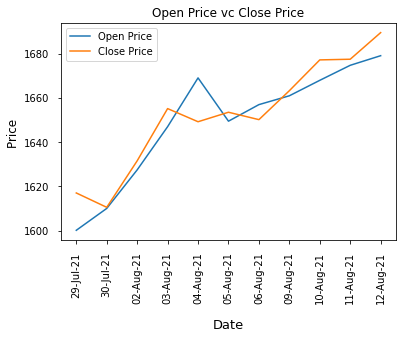

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb


plt.plot(infy_data["Date"],infy_data["Open Price"],label="Open Price");
plt.plot(infy_data["Date"],infy_data["Close Price"],label="Close Price");

plt.xticks(rotation = 90)


plt.title('Open Price vc Close Price')
plt.ylabel('Price ',fontsize=12);
plt.xlabel('Date',fontsize=13,labelpad=15);
plt.legend()
plt.show()